<a href="https://colab.research.google.com/github/chennakt9/DS_Project/blob/master/covid19_effect_on_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive
%cd Colab\ Notebooks/DS_Folder
%cd Chenna/
%cd covid-19-effect-on-pollution/
!ls

/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks/DS_Folder
/content/drive/My Drive/Colab Notebooks/DS_Folder/Chenna
/content/drive/My Drive/Colab Notebooks/DS_Folder/Chenna/covid-19-effect-on-pollution
air-quality-data-in-india  img1.jpg  indian-cities-database


# <a>Reading City Data</a>

In [4]:
city_day = pd.read_csv('./air-quality-data-in-india/city_day.csv')
display(city_day.head(5))

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## <a>Cities in the dataset</a>

In [5]:
cities = city_day['City'].value_counts()
print(cities.index)
city_day['Date'] = pd.to_datetime(city_day['Date'])  ##Convert to Date time format

print("The available data is between Jan/2015 to Jan/2020")

Index(['Ahmedabad', 'Mumbai', 'Delhi', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Jorapokhar',
       'Amritsar', 'Thiruvananthapuram', 'Jaipur', 'Amaravati', 'Brajrajnagar',
       'Talcher', 'Kolkata', 'Guwahati', 'Chandigarh', 'Shillong', 'Bhopal',
       'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')
The available data is between Jan/2015 to Jan/2020


## <a>Combining Pollutants</a>

In [6]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

## Year and Month wise distribution </a>

###NO<sub>2</sub> </a>

,index,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,BTX,Particulate_Matter,year,month
0,0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,0.02,NaN,2015,Jan
1,1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,12.95,NaN,2015,Jan
2,2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,25.45,NaN,2015,Jan
3,3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,15.57,NaN,2015,Jan
4,4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,28.68,NaN,2015,Jan


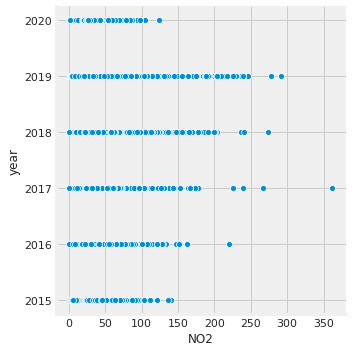

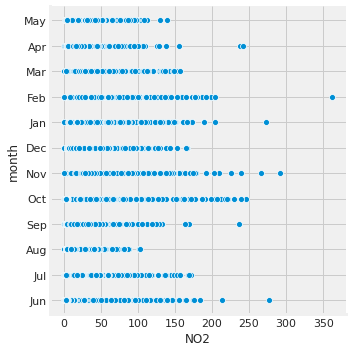

In [7]:
def year_manth_plot(dataframe,value):
    sns.relplot(x=value,y='year',data=df)
    sns.relplot(x=value, y='month', data=df.loc[~df.year.isin([2015, 2020])])
    

city_day.reset_index(inplace=True)
df = city_day.copy()

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

value='NO2'
year_manth_plot(df,value)
display(df.head())


### <a>SO<sub>2</sub> </a>

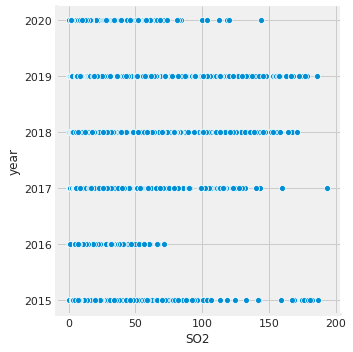

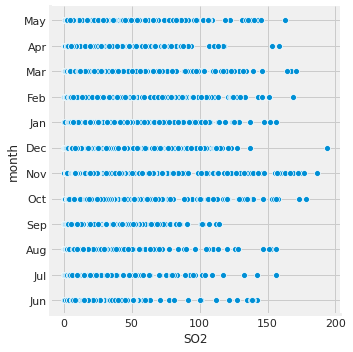

In [8]:
value='SO2'
year_manth_plot(df,value)

### <a>BTX </a>

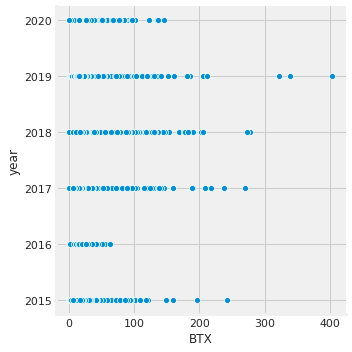

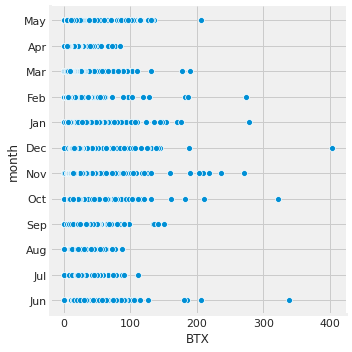

In [9]:
value='BTX'
year_manth_plot(df,value)

### <a>PM2.5 </a>

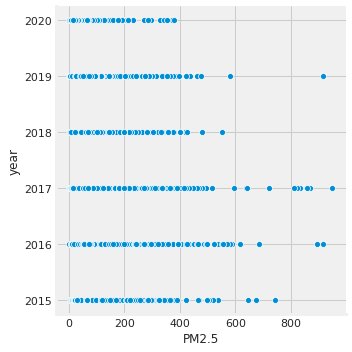

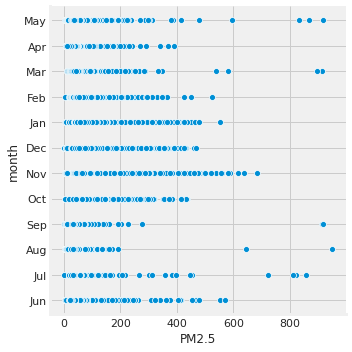

In [10]:
value='PM2.5'
year_manth_plot(df,value)

### <a>PM10 </a>

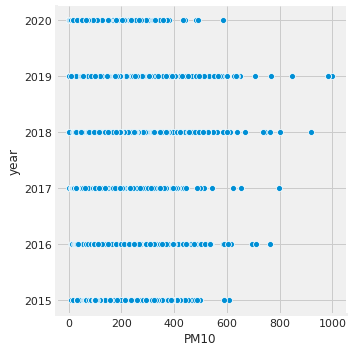

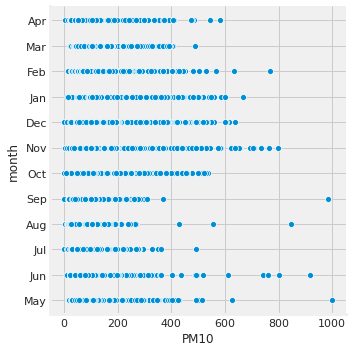

In [11]:
value='PM10'
year_manth_plot(df,value)

# <a>Most Polluted Cities</a>

In [12]:
def most_polluted_city(pollutant):
    df = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    df[pollutant] = round(df[pollutant],2)
    return df[:10].style.background_gradient(cmap='OrRd')

In [13]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [14]:
pm2_5 = most_polluted_city('PM2.5')
pm10 = most_polluted_city('PM10')
no2 = most_polluted_city('NO2')
so2 = most_polluted_city('SO2')
co = most_polluted_city('CO')
btx = most_polluted_city('BTX')


display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

,City,PM2.5
0,Patna,123.500000
1,Delhi,117.200000
2,Gurugram,117.100000
3,Lucknow,111.630000
4,Kolkata,68.690000
5,Ahmedabad,67.850000
6,Jorapokhar,64.230000
7,Brajrajnagar,63.880000
8,Talcher,63.740000
9,Guwahati,63.690000


# <a>Effect of Lockdown on AQI (Air Quality Index)</a>

## City Wise
![](https://imgur.com/JwXoMrw.png)



In [15]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe


City,Ahmedabad,Bengaluru,Chennai,Delhi,Hyderabad,Mumbai
Date,,,,,,
2019-01-01,1474.0,128.0,212.0,475.0,132.0,181.0
2019-01-02,1246.0,103.0,158.0,501.0,133.0,175.0
2019-01-03,1719.0,101.0,167.0,537.0,141.0,239.0
2019-01-04,1264.0,106.0,192.0,432.0,142.0,221.0
2019-01-05,1127.0,104.0,116.0,440.0,148.0,180.0
...,...,...,...,...,...,...
2020-06-27,92.0,51.0,NaN,112.0,NaN,64.0
2020-06-28,82.0,61.0,NaN,196.0,NaN,64.0
2020-06-29,74.0,65.0,NaN,233.0,NaN,54.0




****The black dotted vertical line shows the date on which the first phase of lockdown started in India****






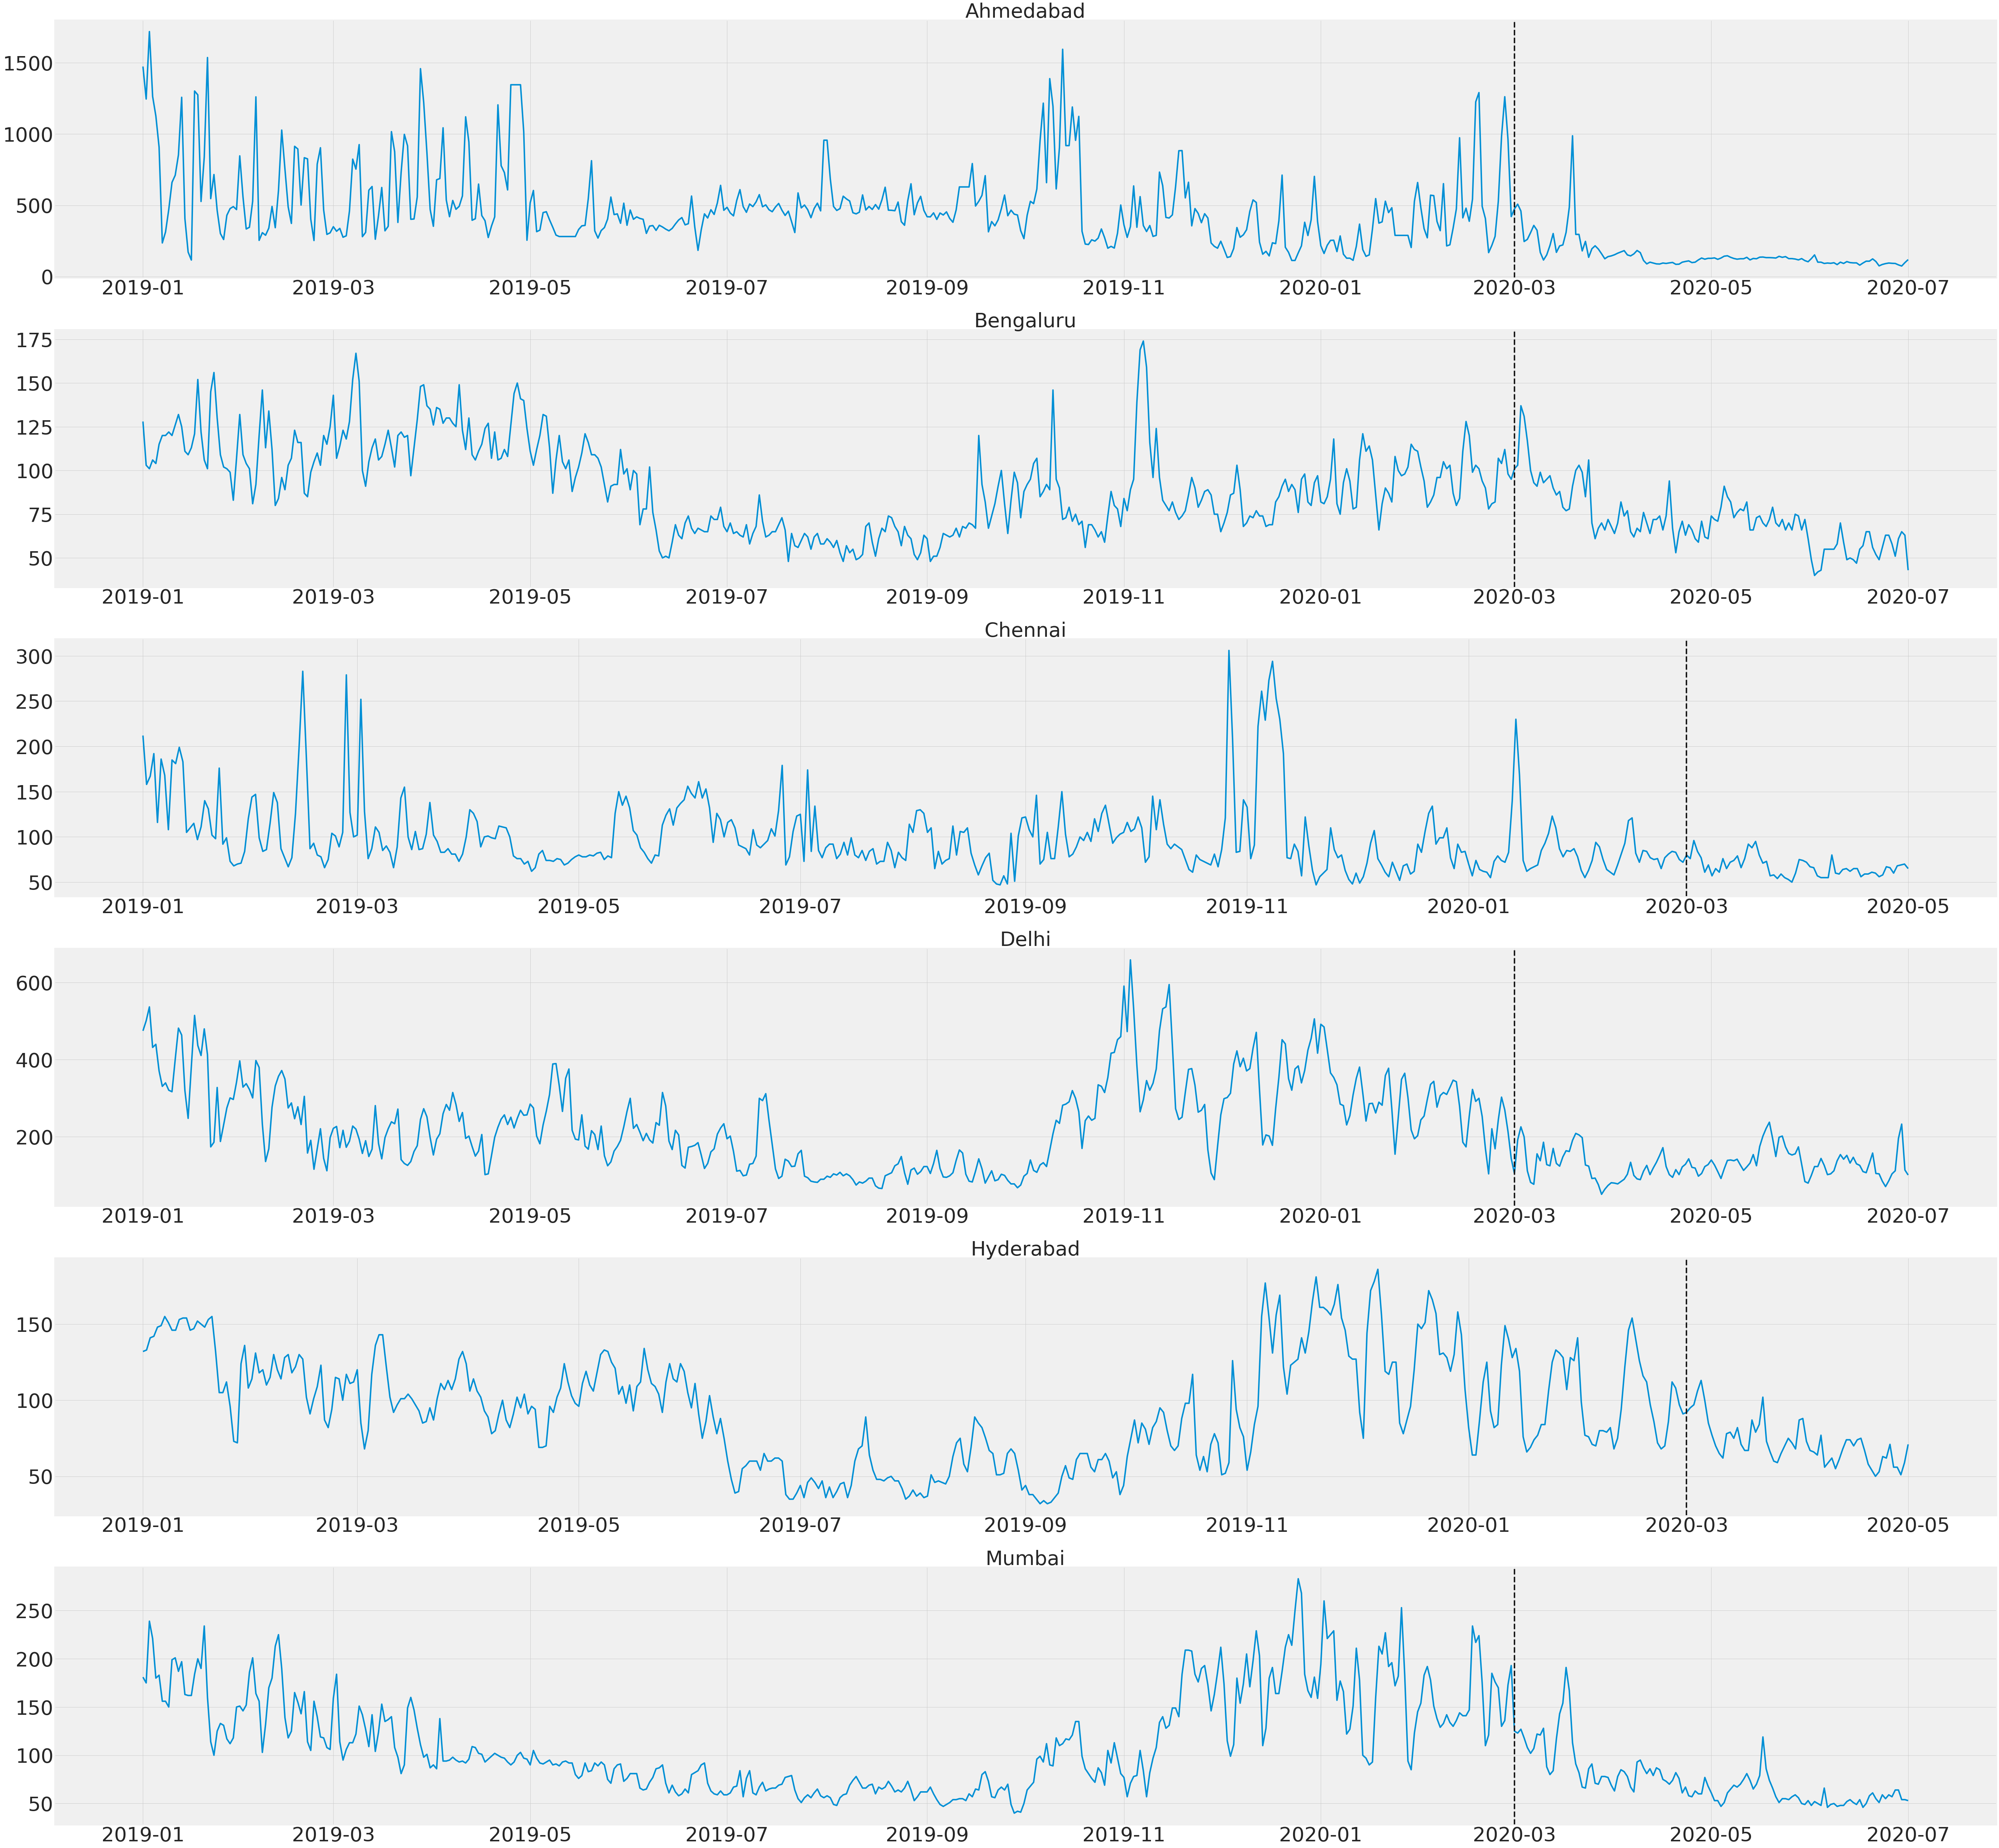

In [16]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)  ##For Filling Nan Values

display(AQI_pivot)

print("\n\n****The black dotted vertical line shows the date on which the first phase of lockdown started in India****\n")
print("\n\n")
plt.rc('xtick',labelsize=54)
plt.rc('ytick',labelsize=54)


fig,a =  plt.subplots(6,1,figsize=(84, 90))

a[0].plot(AQI_pivot["Ahmedabad"])
a[1].plot(AQI_pivot["Bengaluru"])
a[2].plot(AQI_pivot["Chennai"])
a[3].plot(AQI_pivot["Delhi"])
a[4].plot(AQI_pivot["Hyderabad"])
a[5].plot(AQI_pivot["Mumbai"])

a[0].set_title("Ahmedabad",fontsize=54)
a[1].set_title("Bengaluru",fontsize=54)
a[2].set_title("Chennai",fontsize=54)
a[3].set_title("Delhi",fontsize=54)
a[4].set_title("Hyderabad",fontsize=54)
a[5].set_title("Mumbai",fontsize=54)

from datetime import datetime
a[0].axvline(datetime.strptime('2020-03', '%Y-%m'),color='k', linestyle='--')
a[1].axvline(datetime.strptime('2020-03', '%Y-%m'),color='k', linestyle='--')
a[2].axvline(datetime.strptime('2020-03', '%Y-%m'),color='k', linestyle='--')
a[3].axvline(datetime.strptime('2020-03', '%Y-%m'),color='k', linestyle='--')
a[4].axvline(datetime.strptime('2020-03', '%Y-%m'),color='k', linestyle='--')
a[5].axvline(datetime.strptime('2020-03', '%Y-%m'),color='k', linestyle='--')

## <a>AQI before and after Lockdown </a>


In [17]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

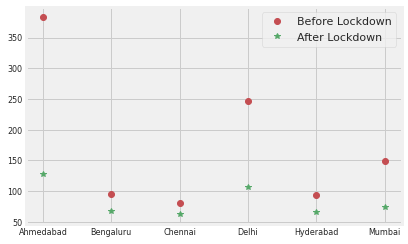




Before Lockdown City
Ahmedabad    383.776471
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64

After Lockdown City
Ahmedabad    127.810811
Bengaluru     68.486486
Chennai       62.189189
Delhi        107.270270
Hyderabad     65.675676
Mumbai        73.891892
dtype: float64


In [18]:
##source : https://stackoverflow.com/questions/45155312/how-to-plot-two-list-in-the-same-graph-but-with-different-colors

import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

plt.plot(AQI_beforeLockdown.mean(),'ro', AQI_afterLockdown.mean(), 'g*')
plt.legend(['Before Lockdown','After Lockdown'])


plt.show()

plt.close()

print("\n\n")
print("Before Lockdown",AQI_beforeLockdown.mean())
print()
print("After Lockdown",AQI_afterLockdown.mean())


# <a>Effect of Lockdown on levels of Individual pollutants <a> 
  

In [19]:
filtered_data_2019 = city_day.loc[(city_day['Date'] >= '2019-01-01') & (city_day['Date']  <= '2019-05-01')]
filtered_data_2019.fillna(method='bfill',inplace=True)
filtered_data_2019.set_index('Date',inplace=True);

filtered_data_2020 = city_day.loc[(city_day['Date'] >= '2020-01-01') & (city_day['Date']  <= '2020-05-01')]
filtered_data_2020.fillna(method='bfill',inplace=True)
filtered_data_2020.set_index('Date',inplace=True);


df1 = filtered_data_2019[filtered_data_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = filtered_data_2020[filtered_data_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

display(df1)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,City,NO2,SO2,PM2.5,CO
Date,,,,,
2019-01-01,Ahmedabad,111.56,80.15,110.71,63.03
2019-01-02,Ahmedabad,107.46,47.70,147.57,59.56
2019-01-03,Ahmedabad,75.82,55.29,131.50,119.68
2019-01-04,Ahmedabad,95.29,69.02,102.12,57.92
2019-01-05,Ahmedabad,111.04,86.65,115.00,63.86
...,...,...,...,...,...
2019-04-27,Mumbai,24.73,24.20,26.23,1.94
2019-04-28,Mumbai,27.13,23.41,23.77,1.88
2019-04-29,Mumbai,22.30,23.80,22.63,1.85


In [20]:
def pollution_comparison(pollutant):
    
    plt.plot(df1[pollutant],'ro', df2[pollutant], 'g*')
    plt.legend(['Before Lockdown','After Lockdown'])
    plt.title(pollutant)
    plt.show()

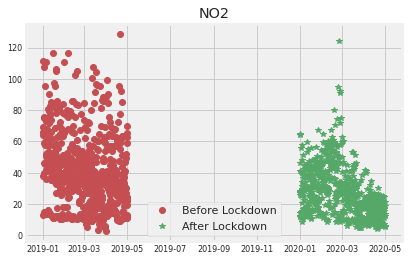

In [21]:

plt.close()
import matplotlib.pyplot as plt

plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

pollution_comparison("NO2")


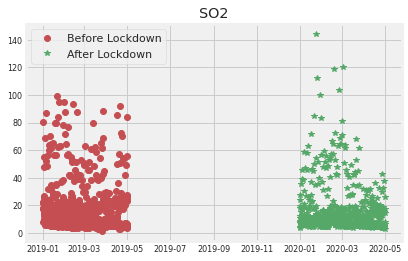

In [22]:
pollution_comparison("SO2")

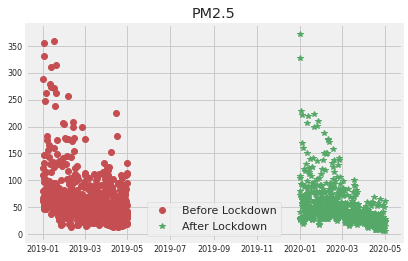

In [23]:
pollution_comparison("PM2.5")

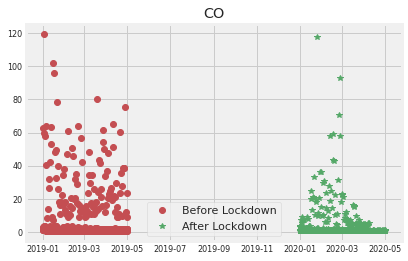

In [24]:
pollution_comparison("CO")
plt.close()

# Pollution levels through Satellites</a>


We can clearly see that btw 25/Mar to 20/Apr NO2 levels have decreased


[source](http://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-5P/Air_pollution_drops_in_India_following_lockdown)

![](https://i.imgur.com/AfmDQnd.jpg)